In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

In [3]:
# Load the dataset
df = pd.read_csv("saudi_projects_v02.csv")

In [4]:
# Handling missing values
df = df.drop(['Unnamed: 0'],axis=1)
cols = ['region_project']
df[cols] = df[cols].fillna(df.mode().iloc[0])
mean = ['project_area']
df[mean] = df[mean].fillna(df.mean().iloc[0])
df = df.dropna(subset=['budget_project'])
df = df[df['budget_project'] <= 86537642000]

In [5]:
# Define budget column for classification
 
# Create a mask for the basic condition 
mask1 = ((df['budget_project'] >= 700000) & (df['budget_project'] <=106391200)) 
mask2 = ((df['budget_project'] >= 106391201) & (df['budget_project'] <=375000000)) 
mask3 = ((df['budget_project'] >= 375000001) & (df['budget_project'] <= 84000000000)) 
 
# Use loc to select rows where condition is met
df.loc[mask1, 'budget_project_2'] ='low' 
df.loc[mask2, 'budget_project_2'] ='medium' 
df.loc[mask3, 'budget_project_2'] ='high' 
 
df

,sectors,sector_budgets,type_project,budget_project,startday_project,start_year,start_month,enddate_project,end_year,end_month,duration_project,project_area,region_project,status_project,budget_project_2
0,Commercial,1058790791316,Commercial,3.350000e+08,2019-07-03,2019.0,7.0,2021-12-31,2021.0,12.0,912.0,7752.0,ALDAMMAM,Under the construction,medium
2,Commercial,1058790791316,"Commercial, Residential",1.178000e+09,2009-01-01,2009.0,1.0,2014-12-31,2014.0,12.0,2190.0,19500.0,RIYADH,Complete,high
4,Commercial,1058790791316,"Hotel, Commercial",1.200000e+08,2019-06-01,2019.0,6.0,2022-03-31,2022.0,3.0,1034.0,3651.0,JEDDAH,Under the construction,medium
8,Commercial,1058790791316,"Hotel, Commercial",5.000000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7940.0,ALTAIF,Suggested projects,low
30,Commercial,1058790791316,Commercial,8.000000e+06,2018-11-01,2018.0,11.0,NaN,NaN,NaN,NaN,12000.0,ALDAMMAM,Under the construction,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,Health,549859453510,"Infrastructure, Governmental, Charity, Health",4.508849e+08,2009-05-01,2009.0,5.0,2014-05-07,2014.0,5.0,1832.0,180000.0,MEDINA,Late,high
2172,Health,549859453510,"Infrastructure, Governmental, Charity, Residen...",4.160000e+08,2012-06-17,2012.0,6.0,2016-06-01,2016.0,6.0,1445.0,64500.0,MEDINA,Late,high
2173,Health,549859453510,"Hotel, Infrastructure, Tourist, Educational, G...",5.500000e+10,2014-07-22,2014.0,7.0,2017-07-22,2017.0,7.0,1096.0,1600000.0,MEDINA,Late,high
2175,Health,549859453510,"Hotel, Infrastructure, Commercial, Tourist, Ed...",2.500000e+10,2009-04-15,2009.0,4.0,2024-04-15,2024.0,4.0,5479.0,4800000.0,MEDINA,Under the construction,high


In [6]:
# Split the dataset 

train, test = train_test_split(
    df,
    test_size=0.2,
    train_size = 0.8,
    random_state=9000
)

In [7]:
df['budget_project_2'] = df['budget_project_2'].map({'low': 0, 'medium':1, 'high':2})
x_train = df.drop(['budget_project','end_month','end_year','enddate_project','start_month', 'start_year','startday_project','duration_project','budget_project_2'],axis = 1)
y_train = df['budget_project_2']

x_test = df.drop(['budget_project','end_month','end_year','enddate_project','start_month', 'start_year','startday_project','duration_project','budget_project_2'],axis = 1)
y_test = df['budget_project_2']

x_train.shape

(835, 6)

In [8]:
#ordinal encoder
ordinal = OrdinalEncoder()

col_names = ["sectors","type_project","region_project","status_project"]

## Ordinal encode the column
ordinal_ls = ordinal.fit_transform(x_train[col_names])
ordinal_ls_val = ordinal.transform(x_test[col_names])

In [9]:
x_train[col_names] = ordinal_ls
x_test[col_names] = ordinal_ls_val

x_train.sample(40)

,sectors,sector_budgets,type_project,project_area,region_project,status_project
1913,7.0,403038920637,93.0,2.347170e+05,1.0,3.0
782,9.0,672120928423,44.0,8.660000e+05,48.0,0.0
969,3.0,1436611825301,92.0,7.500000e+04,18.0,2.0
2167,4.0,549859453510,29.0,9.198532e+11,31.0,3.0
1390,3.0,1436611825301,72.0,9.198532e+11,48.0,2.0
1186,3.0,1436611825301,72.0,9.198532e+11,44.0,6.0
1296,3.0,1436611825301,29.0,1.500000e+04,26.0,2.0
2089,4.0,549859453510,10.0,9.000000e+04,4.0,3.0
1973,5.0,1091256760152,59.0,9.198532e+11,36.0,2.0
778,9.0,672120928423,92.0,2.500000e+05,4.0,3.0


In [10]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(x_train)
X_test_sc = scaler.transform(x_test)

In [11]:
# Decision Tree Classifier
class_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)

class_tree.fit(X_train_sc, y_train)
preds_class = class_tree.predict(X_test_sc)

In [12]:
val_train = round(class_tree.score(X_train_sc, y_train),2)*100
val_test = round(class_tree.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 56.00000000000001%
Test Set Accuracy: 56.00000000000001%


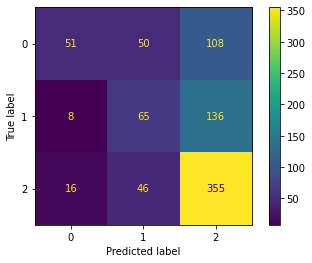

In [13]:
plot_confusion_matrix(class_tree, X_test_sc, y_test);

In [14]:
# Random Forest Classifier
class_forest = RandomForestClassifier(n_estimators = 6, criterion = 'gini', random_state = 0)

class_forest.fit(X_train_sc, y_train)
preds_class = class_forest.predict(X_test_sc)

In [15]:
val_train = round(class_forest.score(X_train_sc, y_train),2)*100
val_test = round(class_forest.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 94.0%
Test Set Accuracy: 94.0%


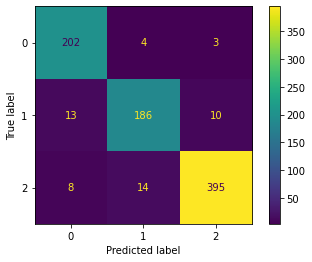

In [16]:
plot_confusion_matrix(class_forest, X_test_sc, y_test);

In [17]:
# SVC
class_sv = SVC(kernel = 'linear', random_state = 0)

class_sv.fit(X_train_sc, y_train)
preds_class = class_sv.predict(X_test_sc)

In [18]:
val_train = round(class_sv.score(X_train_sc, y_train),2)*100
val_test = round(class_sv.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 50.0%
Test Set Accuracy: 50.0%


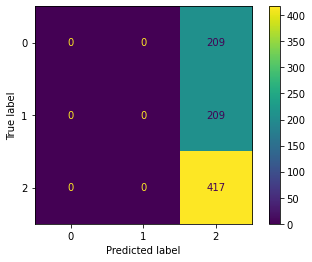

In [19]:
plot_confusion_matrix(class_sv, X_test_sc, y_test);

In [20]:
# XGB Classifier
class_xgb = XGBClassifier()
class_xgb.fit(X_train_sc, y_train)
preds_Xgb = class_xgb.predict(X_test_sc)

C:\Users\assoma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:03:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [21]:
val_train = round(class_xgb.score(X_train_sc, y_train),2)*100
val_test = round(class_xgb.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 96.0%
Test Set Accuracy: 96.0%


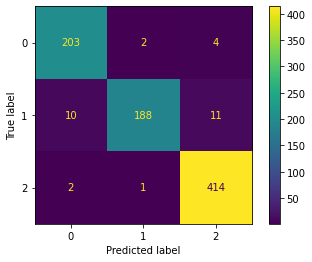

In [22]:
plot_confusion_matrix(class_xgb, X_test_sc, y_test);

Text(0.5, 1.0, 'XGB Classifier Results')

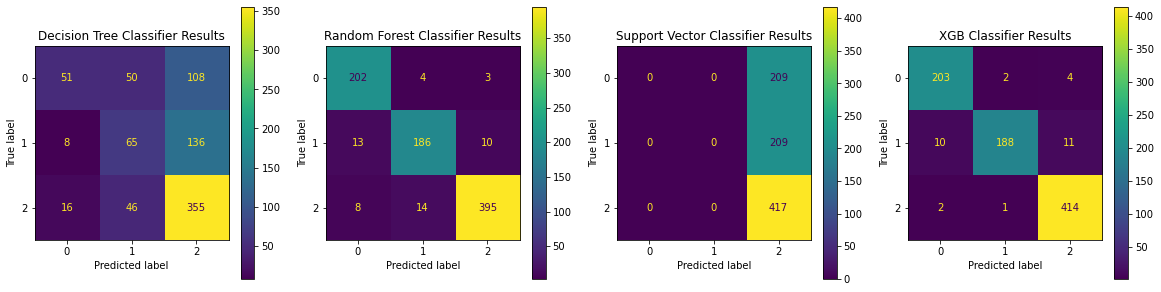

In [23]:
f, axes = plt.subplots(1, 4, figsize=(20, 5))


disp_tree = plot_confusion_matrix(class_tree, X_test_sc, y_test, ax= axes[0])
disp_tree.ax_.set_title('Decision Tree Classifier Results')

disp_forest = plot_confusion_matrix(class_forest, X_test_sc, y_test, ax= axes[1])
disp_forest.ax_.set_title('Random Forest Classifier Results')

disp_sv = plot_confusion_matrix(class_sv, X_test_sc, y_test, ax= axes[2])
disp_sv.ax_.set_title('Support Vector Classifier Results')

disp_sv = plot_confusion_matrix(class_xgb, X_test_sc, y_test, ax= axes[3])
disp_sv.ax_.set_title('XGB Classifier Results')

In [24]:
# Save the model
import pickle
filename = 'saudi_projects_classification.pkl'
pickle.dump(class_xgb, open(filename, 'wb'))

In [25]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_sc, y_test)
print(result)

0.9640718562874252
